#**Revenue Prediction Using Simple Linear Regression**

#**Problem Statement**

##A revenue generation using garbage business will like to predict the daily revenue generated in rupees based on the manure produced in tons. In this project, I applied Linear Regression model to solve the task.

In the dataset, there are two fields -
- Independent variable X: Total garbage produced daily and
- Dependent variable Y: Overall daily revenue generated in rupees.


##Step 1: Libraries Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2: Import Dataset

In [ ]:
garbage = pd.read_csv("/content/garbagedata.csv")

In [ ]:
garbage.head(5)

,c,ORGANIC,PAPER,TOTAL(in tons),MANURE(in tons),REVENUE(rupees),PLASTIC
0,WARD-01,4.28,0.62,4.90,2.70,267300,0.69
1,WARD-02,4.70,0.68,5.38,3.24,320760,0.70
2,WARD-03,4.00,0.70,4.70,3.10,306900,0.58
3,WARD-04,4.90,0.72,5.62,3.41,337590,0.78
4,WARD-05,3.70,0.63,4.33,2.73,270270,0.45


In [ ]:
garbage.tail(5)

,c,ORGANIC,PAPER,TOTAL(in tons),MANURE(in tons),REVENUE(rupees),PLASTIC
131,WARD-132,5.330,0.680,6.010,3.6,356400,0.680
132,WARD-133,5.310,0.691,6.001,3.6,356400,0.691
133,WARD-134,5.330,0.680,6.010,3.6,356400,0.680
134,WARD-135,5.345,0.670,6.015,3.6,356400,0.670
135,WARD-136,5.330,0.682,6.012,3.6,356400,0.682


In [ ]:
garbage

,c,ORGANIC,PAPER,TOTAL(in tons),MANURE(in tons),REVENUE(rupees),PLASTIC
0,WARD-01,4.280,0.620,4.900,2.70,267300,0.690
1,WARD-02,4.700,0.680,5.380,3.24,320760,0.700
2,WARD-03,4.000,0.700,4.700,3.10,306900,0.580
3,WARD-04,4.900,0.720,5.620,3.41,337590,0.780
4,WARD-05,3.700,0.630,4.330,2.73,270270,0.450
...,...,...,...,...,...,...,...
131,WARD-132,5.330,0.680,6.010,3.60,356400,0.680
132,WARD-133,5.310,0.691,6.001,3.60,356400,0.691
133,WARD-134,5.330,0.680,6.010,3.60,356400,0.680
134,WARD-135,5.345,0.670,6.015,3.60,356400,0.670


In [ ]:
garbage.describe()

,ORGANIC,PAPER,TOTAL(in tons),MANURE(in tons),REVENUE(rupees),PLASTIC
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,6.036515,0.589875,6.626390,3.989485,394959.044118,0.818816
std,1.603489,0.622586,1.610245,0.983369,97353.491587,0.612832
min,2.250000,0.100000,2.520000,1.400000,138600.000000,0.100000
25%,4.977500,0.267500,5.788500,3.457500,342292.500000,0.630000
50%,5.802000,0.595000,6.017500,3.620000,358380.000000,0.750000
75%,6.977500,0.722500,7.600000,4.485000,444015.000000,0.830000
max,10.500000,6.700000,12.020000,7.200000,712800.000000,6.700000


In [ ]:
garbage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   c                136 non-null    object 
 1   ORGANIC          136 non-null    float64
 2   PAPER            136 non-null    float64
 3   TOTAL(in tons)   136 non-null    float64
 4   MANURE(in tons)  136 non-null    float64
 5   REVENUE(rupees)  136 non-null    int64  
 6   PLASTIC          136 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.6+ KB


##Step #3: Visualize Dataset

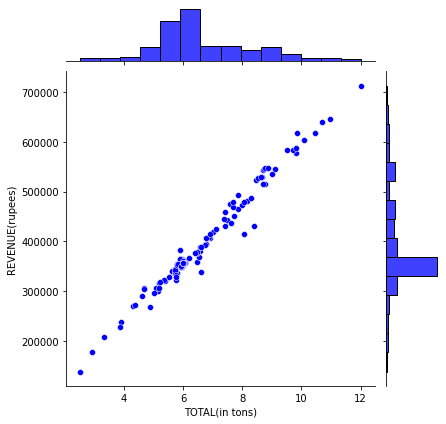

In [ ]:
sns.jointplot( x= 'TOTAL(in tons)', y='REVENUE(rupees)', data = garbage, color = 'blue')

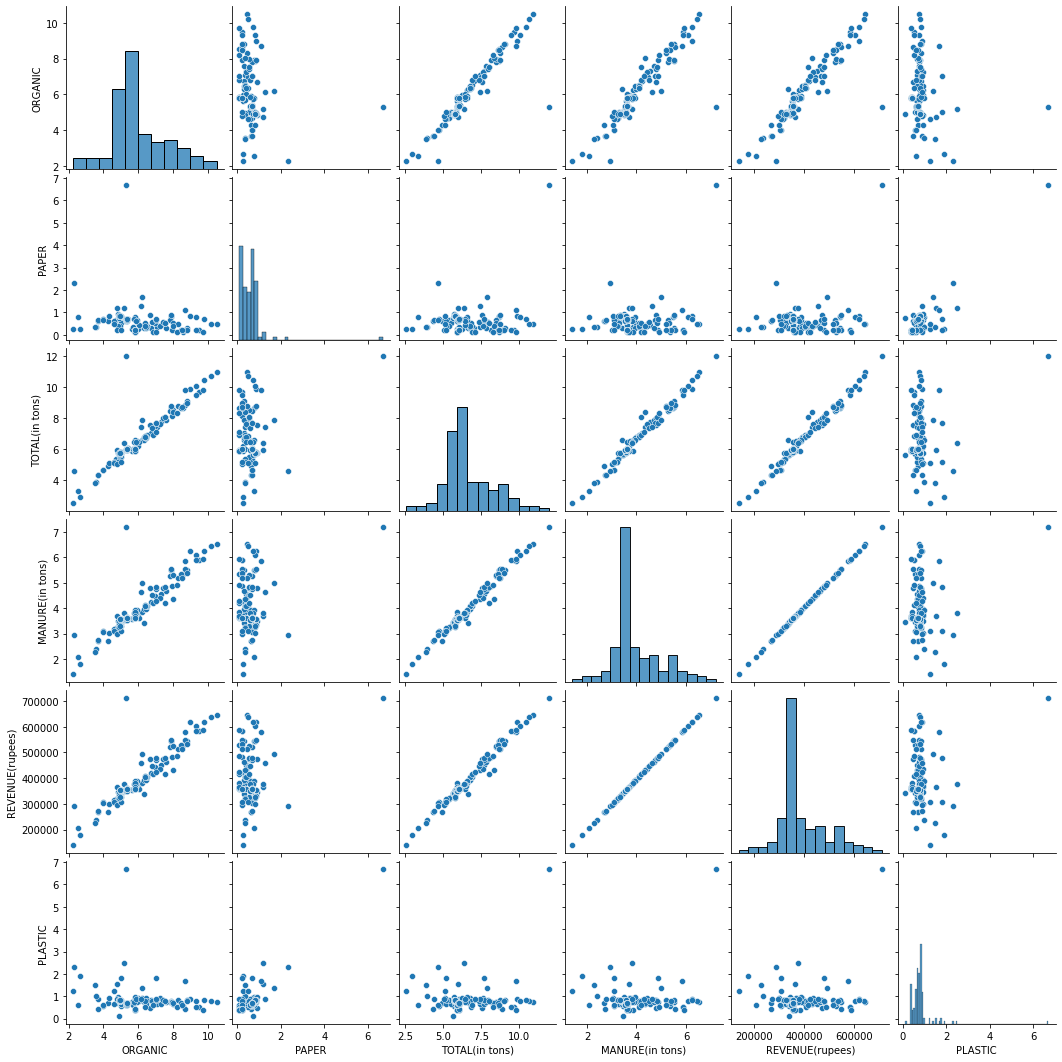

In [ ]:
sns.pairplot(garbage)

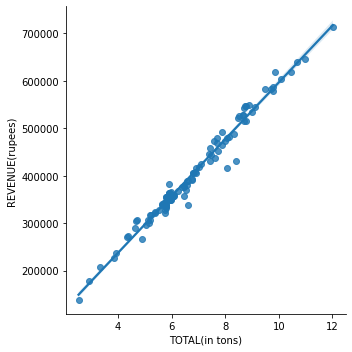

In [ ]:
sns.lmplot(x='TOTAL(in tons)', y='REVENUE(rupees)', data=garbage)

##Step #4: Create Testing and Training Dataset

In [ ]:
X = garbage[['TOTAL(in tons)']]
X

,TOTAL(in tons)
0,4.900
1,5.380
2,4.700
3,5.620
4,4.330
...,...
131,6.010
132,6.001
133,6.010
134,6.015


In [ ]:
Y = garbage[['REVENUE(rupees)']]
Y

,REVENUE(rupees)
0,267300
1,320760
2,306900
3,337590
4,270270
...,...
131,356400
132,356400
133,356400
134,356400


In [ ]:
y = garbage['REVENUE(rupees)']
y

0      267300
1      320760
2      306900
3      337590
4      270270
        ...  
131    356400
132    356400
133    356400
134    356400
135    356400
Name: REVENUE(rupees), Length: 136, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,TOTAL(in tons)
11,3.330
68,3.860
129,6.030
76,8.660
84,9.000
...,...
71,7.870
106,5.780
14,8.720
92,6.010


In [ ]:
X_test

,TOTAL(in tons)
73,4.630
45,6.780
60,6.460
42,7.630
128,6.007
62,5.960
12,4.680
81,8.650
19,8.780
64,2.520


In [ ]:
X_train.shape

(108, 1)

In [ ]:
X_test.shape

(28, 1)

In [ ]:
y_train

11     207900
68     227700
129    356400
76     528660
84     534600
        ...  
71     493020
106    336600
14     546480
92     356400
102    356400
Name: REVENUE(rupees), Length: 108, dtype: int64

In [ ]:
y_test

73     290070
45     405900
60     379170
42     437580
128    356400
62     365310
12     304920
81     528660
19     547470
64     138600
44     358380
51     341550
26     381150
36     405900
31     317790
40     405900
132    356400
105    336600
4      270270
112    354420
120    350460
126    349470
27     360360
16     526680
18     618750
10     339570
66     458370
69     376200
Name: REVENUE(rupees), dtype: int64

In [ ]:
y_train.shape

(108,)

In [ ]:
y_test.shape

(28,)

##Step #5: Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
print('Linear Model Coefficeint (m)', regressor.coef_)
print('Linear Model Coefficeint (b)', regressor.intercept_)

Linear Model Coefficeint (m) [59375.26629543]
Linear Model Coefficeint (b) 527.3696162302513


##Step #6: Test the model

In [ ]:
X_test.shape
(100, 1)

(100, 1)

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
y_predict

array([275434.85256409, 403091.67509927, 384091.58988473, 453560.65145039,
       357194.5942529 , 354403.95673701, 278403.61587886, 514123.42307173,
       521842.20769014, 150153.04068072, 359747.7307036 , 334216.36619657,
       391216.62184018, 410810.45971768, 309872.50701544, 404279.18042518,
       356838.34265513, 341400.77341831, 257622.27267546, 343953.90986902,
       354403.95673701, 353216.45141111, 360935.23602951, 506404.63845332,
       585373.74262625, 343122.65614088, 441685.5981913 , 380529.07390701])

In [ ]:
y_test

73     290070
45     405900
60     379170
42     437580
128    356400
62     365310
12     304920
81     528660
19     547470
64     138600
44     358380
51     341550
26     381150
36     405900
31     317790
40     405900
132    356400
105    336600
4      270270
112    354420
120    350460
126    349470
27     360360
16     526680
18     618750
10     339570
66     458370
69     376200
Name: REVENUE(rupees), dtype: int64

Text(0.5, 1.0, 'Total Garbage(tons) vs REVENUE(rupees)(Training set)')

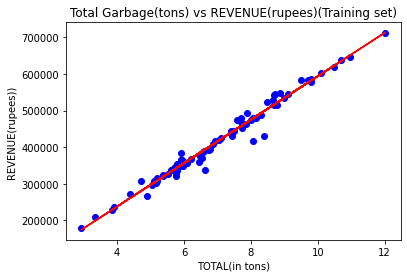

In [ ]:
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel("TOTAL(in tons)")
plt.ylabel("REVENUE(rupees))")
plt.title("Total Garbage(tons) vs REVENUE(rupees)(Training set)")

Text(0.5, 1.0, 'Total Garbage vs REVENUE(rupees) (Testing set)')

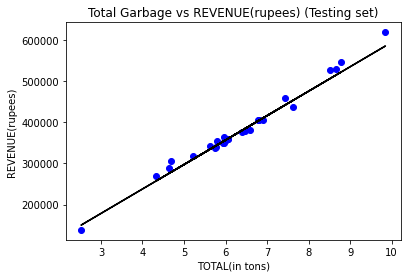

In [ ]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, regressor.predict(X_test), color = 'black')
plt.xlabel("TOTAL(in tons)")
plt.ylabel("REVENUE(rupees)")
plt.title("Total Garbage vs REVENUE(rupees) (Testing set)")

In [ ]:
# Predict the revenue in rupeess that will be generated when the garbage is 40 tons
T = np.array([40]).reshape(1, 1)
revenue = regressor.predict(T)
revenue 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2375538.02143357])

In [ ]:
# Predict the revenue in rupeess that will be generated when the garbage is 10 tons
T = np.array([10]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([594280.03257057])

In [ ]:
# Predict the revenue in rupees that will be generated when the garbage is 25 tons
T = np.array([25]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1484909.02700207])

In [ ]:
# Predict the revenue in rupees that will be generated when the garbage is 25 tons
T = np.array([100]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([5938053.99915959])